# 1. Цель лабораторной работы:

изучение продвинутых способов предварительной обработки данных для дальнейшего формирования моделей.

# 2. Задание:

Выбрать один или несколько наборов данных (датасетов) для решения следующих задач. Каждая задача может быть решена на отдельном датасете, или несколько задач могут быть решены на одном датасете. Просьба не использовать датасет, на котором данная задача решалась в лекции.
Для выбранного датасета (датасетов) на основе материалов лекций решить следующие задачи:
i. масштабирование признаков (не менее чем тремя способами);
ii.обработку выбросов для числовых признаков (по одному способу для удаления выбросов и для замены выбросов);
iii.обработку по крайней мере одного нестандартного признака (который не является числовым или категориальным);
iv. отбор признаков:
один метод из группы методов фильтрации (filter methods);
один метод из группы методов обертывания (wrapper methods);
один метод из группы методов вложений (embedded methods).

# 3. Ход выполнения работы

Импорт библиотек

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

In [3]:
data = pd.read_csv(r'C:\Users\asus\Desktop\iu5\MMO\lab3\data.csv')

In [4]:
data.head()

,Row,Id,Surname,Score,Nationality,Gender,Age,Tenure,Balance,Products,Card,Active,Salary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
data = data.drop('Id', 1)
data.head()

C:\Users\asus\AppData\Local\Temp/ipykernel_22008/222650945.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data = data.drop('Id', 1)


,Row,Surname,Score,Nationality,Gender,Age,Tenure,Balance,Products,Card,Active,Salary,Exited
0,1,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
# Удаление колонок с высоким процентом пропусков (более 25%)
data.dropna(axis=1, thresh=1095)

,Row,Surname,Score,Nationality,Gender,Age,Tenure,Balance,Products,Card,Active,Salary,Exited
0,1,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [7]:
data.describe()

,Row,Score,Age,Tenure,Balance,Products,Card,Active,Salary,Exited
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [8]:
def obj_col(column): 
    return column[1] == 'object'

col_names = []
for col in list(filter(obj_col, list(zip(list(data.columns), list(data.dtypes))))):
  col_names.append(col[0])
col_names.append('Salary')

In [9]:
X_ALL = data.drop(col_names, axis=1)

In [10]:
# Функция для восстановления датафрейма
# на основе масштабированных данных
def arr_to_df(arr_scaled):
    res = pd.DataFrame(arr_scaled, columns=X_ALL.columns)
    return res

In [11]:
# Разделим выборку на обучающую и тестовую
X_train, X_test, y_train, y_test = train_test_split(X_ALL, data['Salary'],
                                                    test_size=0.2,
                                                    random_state=1)
# Преобразуем массивы в DataFrame
X_train_df = arr_to_df(X_train)
X_test_df = arr_to_df(X_test)

X_train_df.shape, X_test_df.shape

((8000, 9), (2000, 9))

# StandardScaler

In [12]:
# Обучаем StandardScaler на всей выборке и масштабируем
cs11 = StandardScaler()
data_cs11_scaled_temp = cs11.fit_transform(X_ALL)
# формируем DataFrame на основе массива
data_cs11_scaled =  arr_to_df(data_cs11_scaled_temp)
data_cs11_scaled

,Row,Score,Age,Tenure,Balance,Products,Card,Active,Exited
0,-1.731878,-0.326221,0.293517,-1.041760,-1.225848,-0.911583,0.646092,0.970243,1.977165
1,-1.731531,-0.440036,0.198164,-1.387538,0.117350,-0.911583,-1.547768,0.970243,-0.505775
2,-1.731185,-1.536794,0.293517,1.032908,1.333053,2.527057,0.646092,-1.030670,1.977165
3,-1.730838,0.501521,0.007457,-1.387538,-1.225848,0.807737,-1.547768,-1.030670,-0.505775
4,-1.730492,2.063884,0.388871,-1.041760,0.785728,-0.911583,0.646092,0.970243,-0.505775
...,...,...,...,...,...,...,...,...,...
9995,1.730492,1.246488,0.007457,-0.004426,-1.225848,0.807737,0.646092,-1.030670,-0.505775
9996,1.730838,-1.391939,-0.373958,1.724464,-0.306379,-0.911583,0.646092,0.970243,-0.505775
9997,1.731185,0.604988,-0.278604,0.687130,-1.225848,-0.911583,-1.547768,0.970243,1.977165
9998,1.731531,1.256835,0.293517,-0.695982,-0.022608,0.807737,0.646092,-1.030670,1.977165


In [13]:
# Построение плотности распределения
def draw_kde(col_list, df1, df2, label1, label2):
    fig, (ax1, ax2) = plt.subplots(
        ncols=2, figsize=(12, 5))
    # первый график
    ax1.set_title(label1)
    sns.kdeplot(data=df1[col_list], ax=ax1)
    # второй график
    ax2.set_title(label2)
    sns.kdeplot(data=df2[col_list], ax=ax2)
    plt.show()

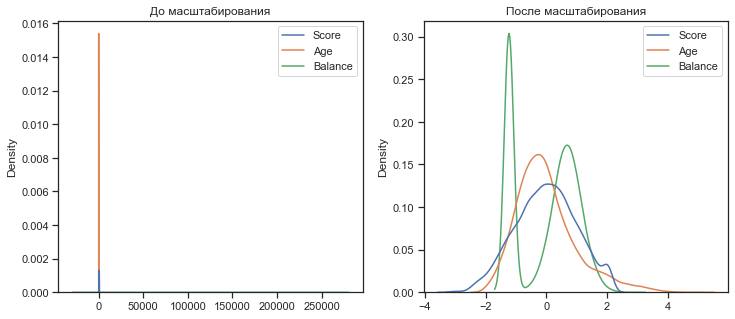

In [14]:
draw_kde(['Score', 'Age', 'Balance'], data, data_cs11_scaled, 'До масштабирования', 'После масштабирования')

# Масштабирование "Mean Normalisation"

In [15]:
# Разделим выборку на обучающую и тестовую
X_train, X_test, y_train, y_test = train_test_split(X_ALL, data['Salary'],
                                                    test_size=0.2,
                                                    random_state=1)
# Преобразуем массивы в DataFrame
X_train_df = arr_to_df(X_train)
X_test_df = arr_to_df(X_test)

X_train_df.shape, X_test_df.shape

((8000, 9), (2000, 9))

In [16]:
class MeanNormalisation:
    
    def fit(self, param_df):
        self.means = X_train.mean(axis=0)
        maxs = X_train.max(axis=0)
        mins = X_train.min(axis=0)
        self.ranges = maxs - mins

    def transform(self, param_df):
        param_df_scaled = (param_df - self.means) / self.ranges
        return param_df_scaled
    
    def fit_transform(self, param_df):
        self.fit(param_df)
        return self.transform(param_df)

In [17]:
sc21 = MeanNormalisation()
data_cs21_scaled = sc21.fit_transform(X_ALL)
data_cs21_scaled.describe()

,Row,Score,Age,Tenure,Balance,Products,Card,Active,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,-0.001795,0.000430,0.000467,-0.001220,0.000089,-0.000558,-0.00150,0.003600,0.000950
std,0.288718,0.193307,0.141727,0.289217,0.248696,0.193885,0.45584,0.499797,0.402769
min,-0.501795,-0.600627,-0.282260,-0.502500,-0.304759,-0.177292,-0.70700,-0.511500,-0.202750
25%,-0.251795,-0.132627,-0.093071,-0.202500,-0.304759,-0.177292,-0.70700,-0.511500,-0.202750
50%,-0.001795,0.003373,-0.025503,-0.002500,0.082644,-0.177292,0.29300,0.488500,-0.202750
75%,0.248205,0.135373,0.069091,0.197500,0.203990,0.156042,0.29300,0.488500,-0.202750
max,0.498205,0.399373,0.717740,0.497500,0.695241,0.822708,0.29300,0.488500,0.797250


In [18]:
cs22 = MeanNormalisation()
cs22.fit(X_train)
data_cs22_scaled_train = cs22.transform(X_train)
data_cs22_scaled_test = cs22.transform(X_test)

In [19]:
data_cs22_scaled_train.describe()

,Row,Score,Age,Tenure,Balance,Products,Card,Active,Exited
count,8.000000e+03,8.000000e+03,8.000000e+03,8.000000e+03,8.000000e+03,8.000000e+03,8.000000e+03,8.000000e+03,8.000000e+03
mean,-2.884498e-17,-1.356207e-17,-2.579534e-17,1.474341e-17,-1.079838e-15,-7.000303e-17,-3.297917e-16,-7.668727e-16,-1.985634e-16
std,2.885589e-01,1.933540e-01,1.414715e-01,2.885856e-01,2.485971e-01,1.945155e-01,4.551669e-01,4.998990e-01,4.020729e-01
min,-5.017945e-01,-6.006273e-01,-2.822601e-01,-5.025000e-01,-3.047590e-01,-1.772917e-01,-7.070000e-01,-5.115000e-01,-2.027500e-01
25%,-2.485942e-01,-1.346273e-01,-9.307095e-02,-2.025000e-01,-3.047590e-01,-1.772917e-01,-7.070000e-01,-5.115000e-01,-2.027500e-01
50%,8.057306e-04,1.372750e-03,-2.550338e-02,-2.500000e-03,8.207197e-02,-1.772917e-01,2.930000e-01,4.885000e-01,-2.027500e-01
75%,2.500307e-01,1.353727e-01,6.909122e-02,1.975000e-01,2.039710e-01,1.560417e-01,2.930000e-01,4.885000e-01,-2.027500e-01
max,4.982055e-01,3.993727e-01,7.177399e-01,4.975000e-01,6.952410e-01,8.227083e-01,2.930000e-01,4.885000e-01,7.972500e-01


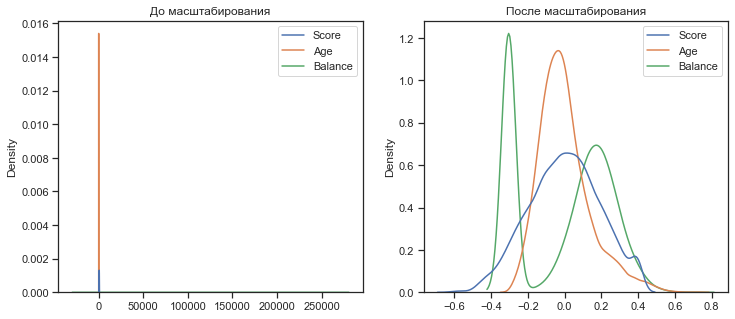

In [20]:
draw_kde(['Score', 'Age', 'Balance'], data, data_cs21_scaled, 'До масштабирования', 'После масштабирования')

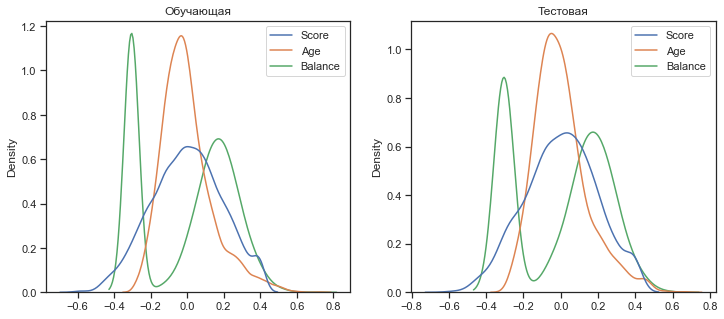

In [21]:
draw_kde(['Score', 'Age', 'Balance'], data_cs22_scaled_train, data_cs22_scaled_test, 'Обучающая', 'Тестовая')

# MinMax-масштабирование

In [22]:
# Обучаем StandardScaler на всей выборке и масштабируем
cs31 = MinMaxScaler()
data_cs31_scaled_temp = cs31.fit_transform(X_ALL)
# формируем DataFrame на основе массива
data_cs31_scaled = arr_to_df(data_cs31_scaled_temp)
data_cs31_scaled.describe()

,Row,Score,Age,Tenure,Balance,Products,Card,Active,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,0.500000,0.601058,0.282727,0.501280,0.304848,0.176733,0.70550,0.515100,0.203700
std,0.288718,0.193307,0.141727,0.289217,0.248696,0.193885,0.45584,0.499797,0.402769
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,0.250000,0.468000,0.189189,0.300000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,0.500000,0.604000,0.256757,0.500000,0.387402,0.000000,1.00000,1.000000,0.000000
75%,0.750000,0.736000,0.351351,0.700000,0.508749,0.333333,1.00000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [23]:
cs32 = MinMaxScaler()
cs32.fit(X_train)
data_cs32_scaled_train_temp = cs32.transform(X_train)
data_cs32_scaled_test_temp = cs32.transform(X_test)
# формируем DataFrame на основе массива
data_cs32_scaled_train = arr_to_df(data_cs32_scaled_train_temp)
data_cs32_scaled_test = arr_to_df(data_cs32_scaled_test_temp)

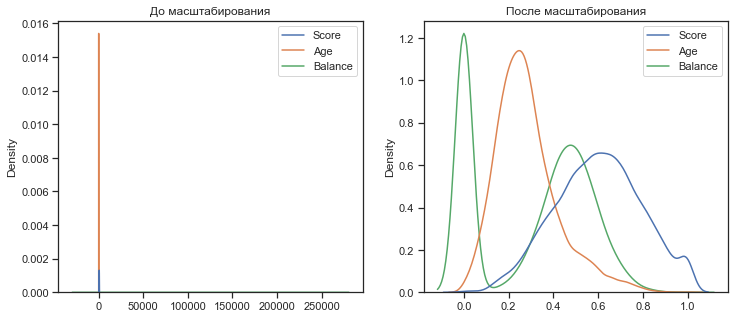

In [24]:
draw_kde(['Score', 'Age', 'Balance'], data, data_cs31_scaled, 'До масштабирования', 'После масштабирования')

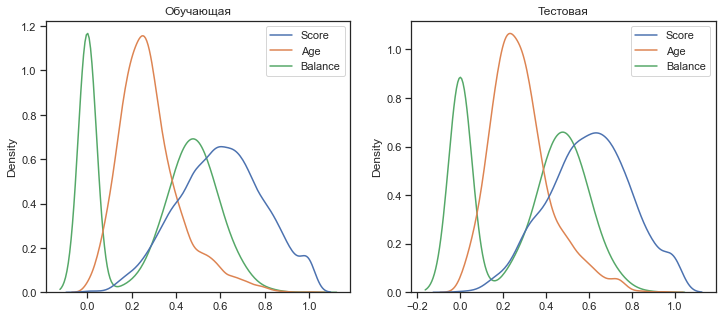

In [25]:
draw_kde(['Score', 'Age', 'Balance'], data_cs32_scaled_train, data_cs32_scaled_test, 'Обучающая', 'Тестовая')

# Обработка выбросов для числовых признаков

In [26]:
data2 = pd.read_csv(r"C:\Users\asus\Desktop\iu5\MMO\lab3\Air_Traffic_Cargo_Statistics.csv")

In [27]:
data2.head()

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Cargo Type Code,Cargo Aircraft Type,Cargo Weight LBS,Cargo Metric TONS
0,200507,ABX Air,GB,ABX Air,GB,Domestic,US,Deplaned,Cargo,Freighter,45423,20.604
1,200507,ABX Air,GB,ABX Air,GB,Domestic,US,Enplaned,Cargo,Freighter,106869,48.476
2,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Cargo,Passenger,55427,25.142
3,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Mail,Passenger,50278,22.806
4,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Cargo,Passenger,74183,33.649


In [28]:
data2.describe()

,Activity Period,Cargo Weight LBS,Cargo Metric TONS
count,35599.000000,3.559900e+04,35599.000000
mean,201311.369449,4.799115e+05,217.687856
std,473.480500,9.509778e+05,431.363548
min,200507.000000,1.000000e+00,0.000000
25%,200905.000000,1.839650e+04,8.344500
50%,201307.000000,1.329570e+05,60.309000
75%,201709.000000,5.469705e+05,248.106000
max,202109.000000,2.381234e+07,10801.278000


In [29]:
def diagnostic_plots(df, variable, title):
    fig, ax = plt.subplots(figsize=(10,7))
    # гистограмма
    plt.subplot(2, 2, 1)
    df[variable].hist(bins=30)
    ## Q-Q plot
    plt.subplot(2, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    # ящик с усами
    plt.subplot(2, 2, 3)
    sns.violinplot(x=df[variable])    
    # ящик с усами
    plt.subplot(2, 2, 4)
    sns.boxplot(x=df[variable])  
    fig.suptitle(title)
    plt.show()

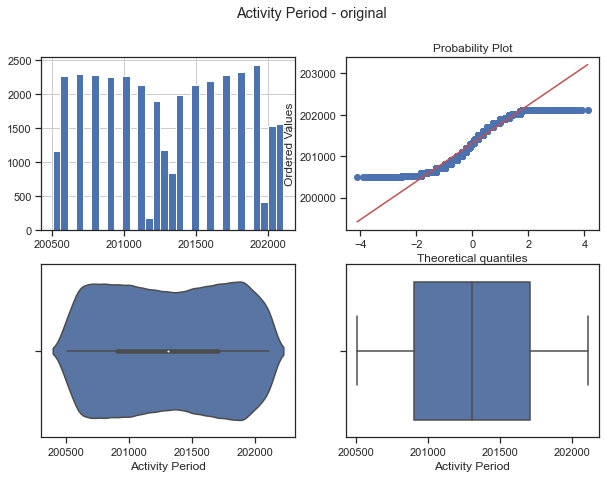

In [34]:
diagnostic_plots(data2, 'Activity Period', 'Activity Period - original')

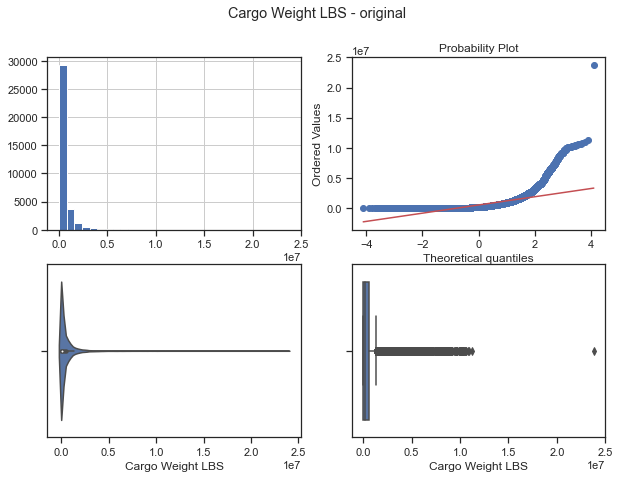

In [36]:
diagnostic_plots(data2, 'Cargo Weight LBS', 'Cargo Weight LBS - original')

In [37]:
from enum import Enum
class OutlierBoundaryType(Enum):
    SIGMA = 1
    QUANTILE = 2
    IRQ = 3

In [38]:
def get_outlier_boundaries(df, col):
    lower_boundary = df[col].quantile(0.05)
    upper_boundary = df[col].quantile(0.95)
    return lower_boundary, upper_boundary

# Удаление выбросов (number_of_reviews)

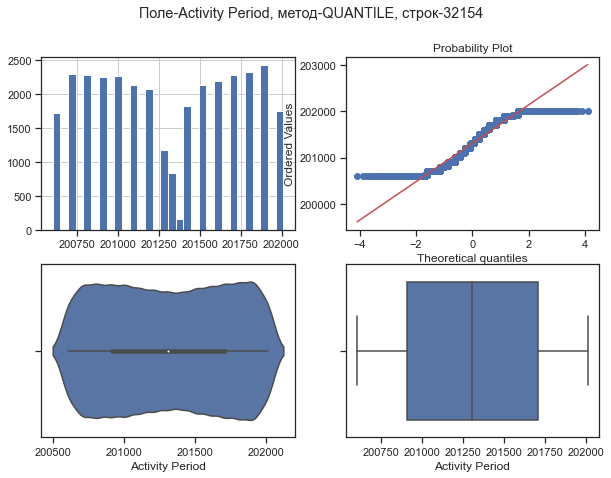

In [39]:
# Вычисление верхней и нижней границы
lower_boundary, upper_boundary = get_outlier_boundaries(data2, "Activity Period")
# Флаги для удаления выбросов
outliers_temp = np.where(data2["Activity Period"] > upper_boundary, True, 
                         np.where(data2["Activity Period"] < lower_boundary, True, False))
# Удаление данных на основе флага
data_trimmed = data2.loc[~(outliers_temp), ]  
title = 'Поле-{}, метод-{}, строк-{}'.format("Activity Period", "QUANTILE", data_trimmed.shape[0])
diagnostic_plots(data_trimmed, "Activity Period", title)

# Замена выбросов

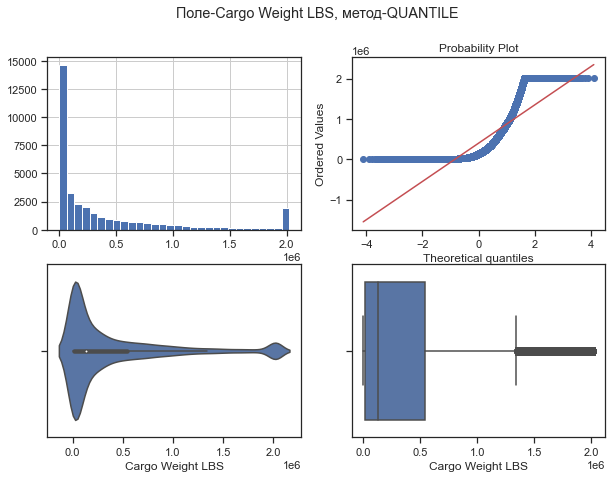

In [41]:
# Вычисление верхней и нижней границы
lower_boundary, upper_boundary = get_outlier_boundaries(data2, "Cargo Weight LBS")
# Изменение данных
data2["Cargo Weight LBS"] = np.where(data2["Cargo Weight LBS"] > upper_boundary, upper_boundary,
                     np.where(data2["Cargo Weight LBS"] < lower_boundary, lower_boundary, data2["Cargo Weight LBS"]))
title = 'Поле-{}, метод-{}'.format("Cargo Weight LBS", "QUANTILE")
diagnostic_plots(data2, "Cargo Weight LBS", title)

# Обработка нестандартного признака

In [42]:
data2.dtypes

Activity Period                  int64
Operating Airline               object
Operating Airline IATA Code     object
Published Airline               object
Published Airline IATA Code     object
GEO Summary                     object
GEO Region                      object
Activity Type Code              object
Cargo Type Code                 object
Cargo Aircraft Type             object
Cargo Weight LBS               float64
Cargo Metric TONS              float64
dtype: object

# Отбор признаков

# Метод фильтрации (Корреляция признаков)

<AxesSubplot:>

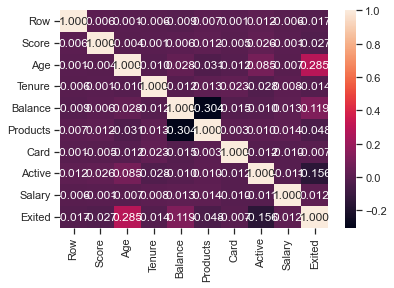

In [45]:
sns.heatmap(data.corr(), annot=True, fmt='.3f')

In [46]:
# Формирование DataFrame с сильными корреляциями
def make_corr_df(df):
    cr = data.corr()
    cr = cr.abs().unstack() 
    cr = cr.sort_values(ascending=False)
    cr = cr[cr >= 0.3]
    cr = cr[cr < 1]
    cr = pd.DataFrame(cr).reset_index()
    cr.columns = ['f1', 'f2', 'corr']
    return cr

In [47]:
# Обнаружение групп коррелирующих признаков
def corr_groups(cr):
    grouped_feature_list = []
    correlated_groups = []

    for feature in cr['f1'].unique():
        if feature not in grouped_feature_list:
            # находим коррелирующие признаки
            correlated_block = cr[cr['f1'] == feature]
            cur_dups = list(correlated_block['f2'].unique()) + [feature]
            grouped_feature_list = grouped_feature_list + cur_dups
            correlated_groups.append(cur_dups)
    return correlated_groups

In [48]:
# Группы коррелирующих признаков
corr_groups(make_corr_df(data))

[['Products', 'Balance']]

# Метод из группы методов вложений

In [49]:
data3 = pd.read_csv(r"C:\Users\asus\Desktop\iu5\MMO\lab3\waste water treatment.csv", sep=",")

In [51]:
data3.head(5)

,Variable,VariableDescription,Country,Year,PercentageValue
0,TOTPUBSEW,Total public sewerage (% of resident populatio...,Australia,2010,92.79
1,TOTPUBSEW,Total public sewerage (% of resident populatio...,Australia,2011,93.84
2,TOTPUBSEW,Total public sewerage (% of resident populatio...,Australia,2012,94.10
3,TOTPUBSEW,Total public sewerage (% of resident populatio...,Australia,2013,94.08
4,TOTPUBSEW,Total public sewerage (% of resident populatio...,Australia,2014,92.57


In [52]:
X3_ALL = data3.drop(['Variable'], axis=1)

In [54]:
# Разделим выборку на обучающую и тестовую
X3_train, X3_test, y3_train, y3_test = train_test_split(X3_ALL, data3['Variable'],
                                                    test_size=0.2,
                                                    random_state=1)